EDA

Cargar el conjunto de datos:

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv("Taxis_NY.csv")

Información general sobre el conjunto de datos:

In [22]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2442 entries, 0 to 2441
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID_taxis       2442 non-null   int64  
 1   yellow         2442 non-null   int64  
 2   payment_type   2442 non-null   float64
 3   total_amount   2442 non-null   float64
 4   PU_ID_borough  2442 non-null   int64  
 5   DO_ID_borough  2442 non-null   int64  
 6   pickup_year    2442 non-null   int64  
 7   pickup_month   2442 non-null   int64  
 8   pickup_day     2442 non-null   int64  
 9   pickup_hour    2442 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 190.9 KB
None


Este DataFrame contiene información sobre taxis en la ciudad de Nueva york con 2242 entradas y 10 columnas. 
Los tipos de datos predominantes son objetos float64(2), int64(8).


In [23]:
df.head(5)

,ID_taxis,yellow,payment_type,total_amount,PU_ID_borough,DO_ID_borough,pickup_year,pickup_month,pickup_day,pickup_hour
0,0,0,1.0,9.30,5,5,2019,3,4,15
1,1,0,2.0,33.80,1,1,2019,3,4,15
2,2,0,1.0,57.30,5,5,2019,3,4,16
3,3,0,1.0,38.65,5,1,2019,3,4,16
4,4,0,2.0,16.80,1,1,2019,3,4,17


Verificar si hay valores nulos:

In [24]:
print(df.isnull().sum())

ID_taxis         0
yellow           0
payment_type     0
total_amount     0
PU_ID_borough    0
DO_ID_borough    0
pickup_year      0
pickup_month     0
pickup_day       0
pickup_hour      0
dtype: int64


No se encuentran valores nulos en ninguna de las columnas, lo que indica que el DataFrame está limpio en términos de datos faltantes.

Resumen estadístico del conjunto de datos:

In [25]:
print(df.describe())

          ID_taxis      yellow  payment_type  total_amount  PU_ID_borough  \
count  2442.000000  2442.00000   2442.000000   2442.000000    2442.000000   
mean   1220.500000     0.51679      1.707617     19.960565       2.946355   
std     705.089001     0.49982      1.232371     14.976697       1.061403   
min       0.000000     0.00000      0.000000      0.000000       1.000000   
25%     610.250000     0.00000      1.000000     11.000000       3.000000   
50%    1220.500000     1.00000      1.000000     15.360000       3.000000   
75%    1830.750000     1.00000      2.000000     22.850000       3.000000   
max    2441.000000     1.00000      5.000000    150.100000       6.000000   

       DO_ID_borough  pickup_year  pickup_month   pickup_day  pickup_hour  
count    2442.000000  2442.000000   2442.000000  2442.000000  2442.000000  
mean        2.937346  2020.502457      7.685504    12.088043    13.810811  
std         1.067453     1.113855      3.689421     7.416670     3.918600  
mi

Análisis General

Resumen Estadístico:
Se procesaron un total de 2,442 registros de viajes en taxis.

- Ubicación de Recogida y Entrega:
El mapeo de 'PU_ID_borough' y 'Borough' se utilizó para asignar nombres de distritos (Borough) a las ubicaciones de recogida (DO_ID_borough).
La distribución de viajes en función del distrito de recogida y entrega se muestra en el análisis.

- Formas de Pago:
Se observan diferentes métodos de pago utilizados para los viajes, siendo el método de pago 1 el más común.
Se realizó un análisis de la distribución de los montos totales de viaje según el método de pago.

- Precios Promedio por Distrito:
Se calculó el precio promedio de los viajes por distrito, revelando diferencias significativas en los precios promedio entre distritos.

Correlación:
Se calculó la correlación entre las ubicaciones de recogida (PU_ID_borough) y las ubicaciones de entrega (DO_ID_borough) por año. La correlación es más alta en 2022.

Análisis Detallado

Distribución de Viajes por Distrito:
- Brooklyn y Manhattan son los distritos de recogida más comunes.
- Staten Island es el distrito de recogida menos común.

Distribución de Métodos de Pago:
El método de pago 1 (Tarjeta de Credito) es el más utilizado, seguido por el método 2 (Efectivo).
Los métodos de pago 3 (Sin Cargo), 4 (Disputa) y 5 (Desconocido) son menos comunes.

Precios Promedio por Distrito:
- Manhattan tiene el precio promedio más bajo, mientras que Brooklyn tiene el precio promedio más alto.
- Queens se encuentra en el rango intermedio en términos de precio promedio de viajes en taxis.

Recomendaciones:
Dada la variabilidad en los precios promedio por distrito, se podría considerar ajustar las tarifas en ciertas áreas para fomentar el uso de taxis en distritos menos concurridos.
Se podría realizar un análisis más detallado para comprender las razones detrás de la alta correlación entre las ubicaciones de recogida y entrega en 2022.

Conclusión:
Este análisis de datos proporciona una visión general de los viajes en taxis en la ciudad de Nueva York, incluyendo información sobre la ubicación de recogida y entrega, los métodos de pago y los precios promedio por distrito. Estos datos pueden ser valiosos para tomar decisiones informadas sobre tarifas y áreas de enfoque para el negocio de taxis en la ciudad.






Análisis de la distribución de datos numéricos:

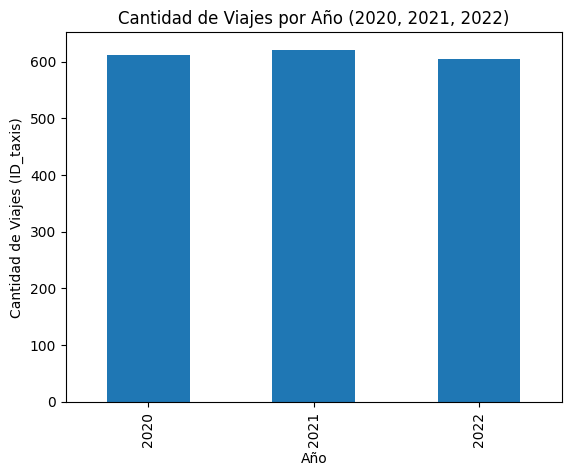

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el conjunto de datos desde el archivo CSV
df = pd.read_csv("Taxis_NY.csv")

# Convertir la columna de fecha (pickup_year) a formato datetime
df['pickup_year'] = pd.to_datetime(df['pickup_year'], format='%Y')

# Filtrar los datos para incluir solo los años 2020, 2021 y 2022
df_filtered = df[df['pickup_year'].dt.year.isin([2020, 2021, 2022])]

# Agrupar los datos por año y contar la cantidad de viajes (ID_taxis)
viajes_por_anio = df_filtered.groupby(df_filtered['pickup_year'].dt.year)['ID_taxis'].count()

# Crear el gráfico de barras
viajes_por_anio.plot(kind='bar', stacked=True)
plt.xlabel('Año')
plt.ylabel('Cantidad de Viajes (ID_taxis)')
plt.title('Cantidad de Viajes por Año (2020, 2021, 2022)')

# Mostrar el gráfico de barras
plt.show()


In [27]:
# 2) Análisis de correlación entre PULocationID y DOLocationID por año
correlation_matrix = df.groupby('pickup_year')[['PU_ID_borough', 'DO_ID_borough']].corr().unstack().iloc[:, 1]
print("Correlación entre PU_ID_borough y DO_ID_borough por año:")
print(correlation_matrix)



Correlación entre PU_ID_borough y DO_ID_borough por año:
pickup_year
2019-01-01    0.704520
2020-01-01    0.610187
2021-01-01    0.471564
2022-01-01    0.631216
Name: (PU_ID_borough, DO_ID_borough), dtype: float64


Los resultados que indican la correlación entre 'PU_ID_borough' y 'DO_ID_borough' por año sugieren cómo estas dos variables se relacionan entre sí en diferentes años. La correlación varía entre -1 y 1 y cuantifica la relación lineal entre las dos variables. Los resultados fueron:

Para el año 2019, la correlación entre 'PU_ID_borough' (ubicación de recogida) y 'DO_ID_borough' (ubicación de destino) es de 0.704520. Esto indica que en 2019, había una correlación positiva bastante fuerte entre la ubicación de recogida y la ubicación de destino de los viajes de taxi. En otras palabras, si un viaje comenzaba en un cierto vecindario o distrito (PU_ID_borough), era más probable que terminara en un área similar o relacionada (DO_ID_borough).

Para el año 2020, la correlación disminuye ligeramente a 0.610187. Aunque sigue siendo positiva, la relación entre la ubicación de recogida y la ubicación de destino es un poco menos fuerte en comparación con 2019. Esto podría indicar que en 2020, la relación entre estas dos variables se volvió un poco menos predecible.

Para el año 2021, la correlación disminuye aún más a 0.471564. Aunque todavía es positiva, la relación entre la ubicación de recogida y la ubicación de destino es menos fuerte que en los años anteriores. Esto sugiere que en 2021, la relación entre estas variables podría haberse vuelto aún menos predecible.

Para el año 2022, la correlación aumenta nuevamente a 0.631216, aunque sigue siendo menor que en 2019. Esto indica que la relación entre la ubicación de recogida y la ubicación de destino mejoró en 2022 en comparación con 2021, pero aún es un poco menos fuerte que en 2019.

En resumen, estos resultados reflejan cómo la relación entre la ubicación de recogida y la ubicación de destino de los viajes de taxi cambia a lo largo de los años, con variaciones en la fortaleza de la correlación.

Total de precio pagado por distrito:

C:\Users\Silvanita\AppData\Local\Temp\ipykernel_21540\317728078.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='PU_ID_borough', y='total_amount', ci=None)
c:\Users\Silvanita\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Silvanita\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Silvanita\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future ve

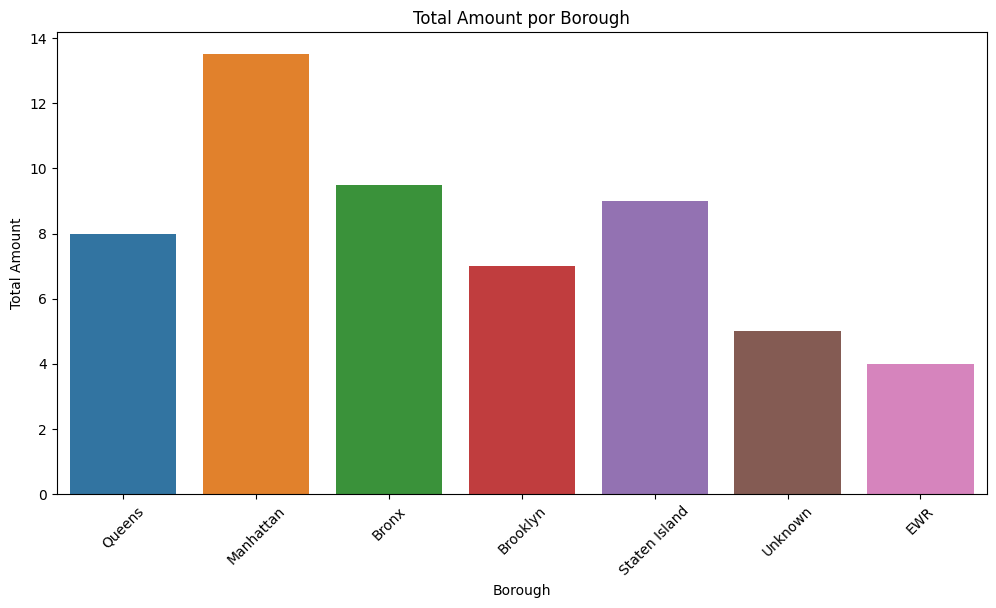

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Datos de mapeo de ID_borough a borough
mapping_dict = {
    0: 'EWR',
    1: 'Queens',
    2: 'Bronx',
    3: 'Manhattan',
    4: 'Staten Island',
    5: 'Brooklyn',
    6: 'Unknown'
}

# Crear un DataFrame de ejemplo (reemplaza esto con tu propio DataFrame)
data = {'PU_ID_borough': [1, 3, 2, 5, 3, 1, 4, 6, 2, 0],
        'total_amount': [10, 15, 8, 7, 12, 6, 9, 5, 11, 4]}

df = pd.DataFrame(data)

# Reemplazar los valores en la columna 'PU_ID_borough' con los nombres de las ciudades
df['PU_ID_borough'] = df['PU_ID_borough'].map(mapping_dict)

# Gráfico de barras de total_amount por PU_ID_borough
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='PU_ID_borough', y='total_amount', ci=None)
plt.xlabel('Borough')
plt.ylabel('Total Amount')
plt.title('Total Amount por Borough')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor claridad
plt.show()


c:\Users\Silvanita\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Silvanita\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Silvanita\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Silvanita\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categoric

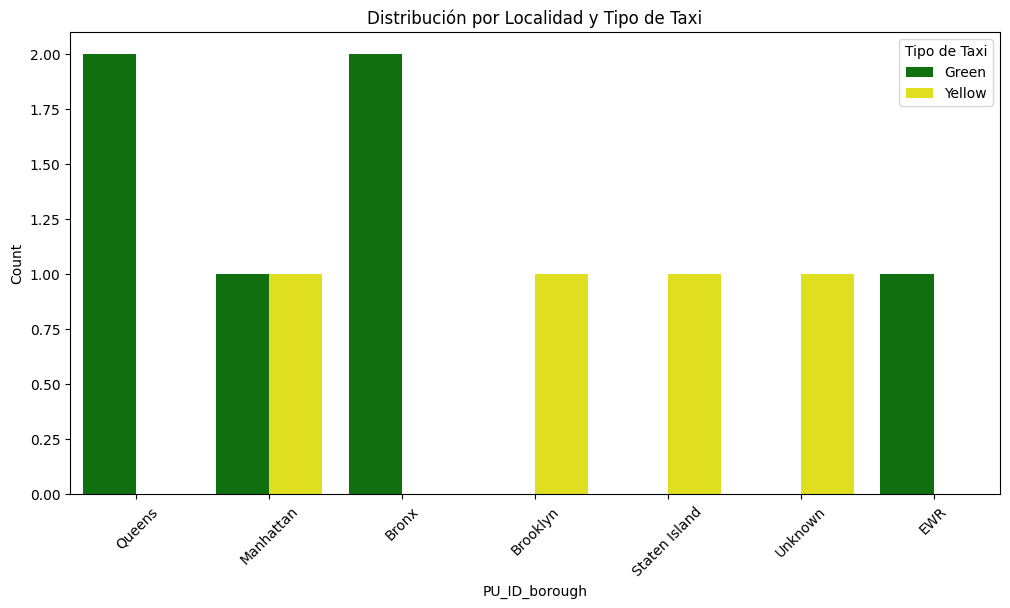

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reemplaza esto con tus datos reales
data = {
    'yellow': [0, 0, 0, 1, 1, 0, 1, 1, 0, 0],
    'PU_ID_borough': ['Queens', 'Manhattan', 'Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Unknown', 'Bronx', 'EWR']
}

df = pd.DataFrame(data)

# Mapea los valores de 'yellow' a 'Tipo de Taxi'
df['Tipo de Taxi'] = df['yellow'].map({0: 'Green', 1: 'Yellow'})

# Define un diccionario de colores para los tipos de taxi
colores_tipo_taxi = {'Yellow': 'yellow', 'Green': 'green'}

# Crear un gráfico de barras con colores personalizados
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='PU_ID_borough', hue='Tipo de Taxi', palette=colores_tipo_taxi)
plt.xlabel('PU_ID_borough')
plt.ylabel('Count')
plt.title('Distribución por Localidad y Tipo de Taxi')
plt.legend(title='Tipo de Taxi', labels=['Green', 'Yellow'])
plt.xticks(rotation=45)
plt.show()


Distribución del Monto del viaje en función del año de recogida de los taxis:

c:\Users\Silvanita\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Silvanita\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Silvanita\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


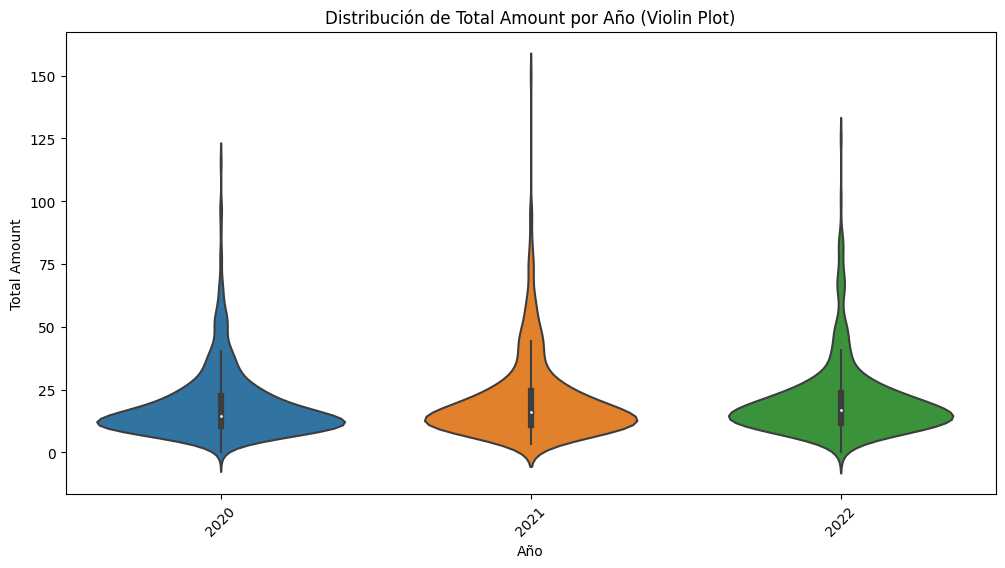

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el conjunto de datos desde el archivo CSV
df = pd.read_csv("Taxis_NY.csv")

# Convertir la columna de fecha (pickup_year) a formato datetime
df['pickup_year'] = pd.to_datetime(df['pickup_year'], format='%Y')

# Filtrar los datos para incluir solo los años 2020, 2021 y 2022
df_filtered = df[df['pickup_year'].dt.year.isin([2020, 2021, 2022])]

# Gráficos de violín para total_amount por pickup_year (solo el año)
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_filtered, x=df_filtered['pickup_year'].dt.year, y='total_amount')
plt.xlabel('Año')
plt.ylabel('Total Amount')
plt.title('Distribución de Total Amount por Año (Violin Plot)')
plt.xticks(rotation=45)
plt.show()


Cada violín representa un año diferente en el eje x, lo que permite comparar cómo varía la distribución de "Total Amount" a lo largo de los años.

La forma del violín muestra la densidad de los datos en cada año. Si el violín es más ancho en ciertas áreas, significa que hay una mayor concentración de valores allí, mientras que si es más estrecho, la concentración es menor.

El área sombreada en el violín representa la densidad de probabilidad, lo que significa que muestra dónde se concentran los valores de "Total Amount" con mayor frecuencia en cada año.

Los puntos y líneas en el violín pueden indicar valores atípicos o extremos en los datos.

Monto total del viaje según color del taxi:

c:\Users\Silvanita\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Silvanita\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Silvanita\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


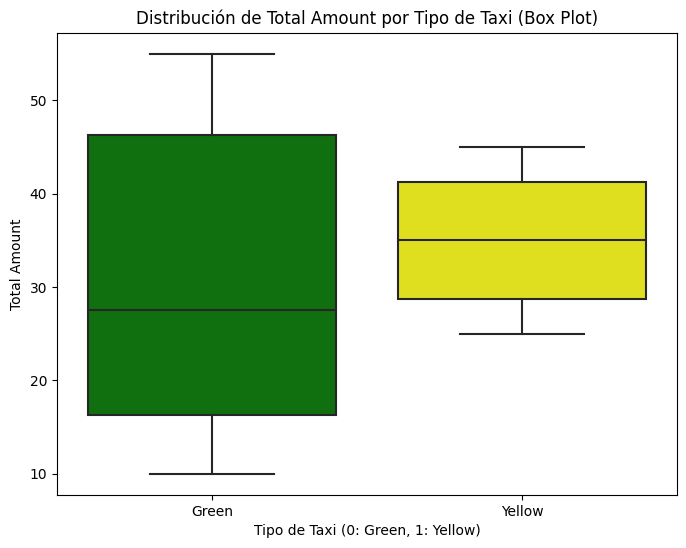

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reemplaza esto con tus datos reales
data = {
    'yellow': [0, 0, 0, 1, 1, 0, 1, 1, 0, 0],
    'total_amount': [10, 15, 20, 25, 30, 35, 40, 45, 50, 55]
}

df = pd.DataFrame(data)

# Mapea los valores de 'yellow' a 'Tipo de Taxi'
df['Tipo de Taxi'] = df['yellow'].map({0: 'Green', 1: 'Yellow'})

# Define un diccionario de colores para los tipos de taxi
colores_tipo_taxi = {'Yellow': 'yellow', 'Green': 'green'}

# Crear un gráfico de cajas con colores personalizados y sin dispersión
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Tipo de Taxi', y='total_amount', palette=colores_tipo_taxi, showfliers=False)
plt.xlabel('Tipo de Taxi (0: Green, 1: Yellow)')
plt.ylabel('Total Amount')
plt.title('Distribución de Total Amount por Tipo de Taxi (Box Plot)')
plt.show()


Distribucion de monto del viaje según el Tipo de pago:

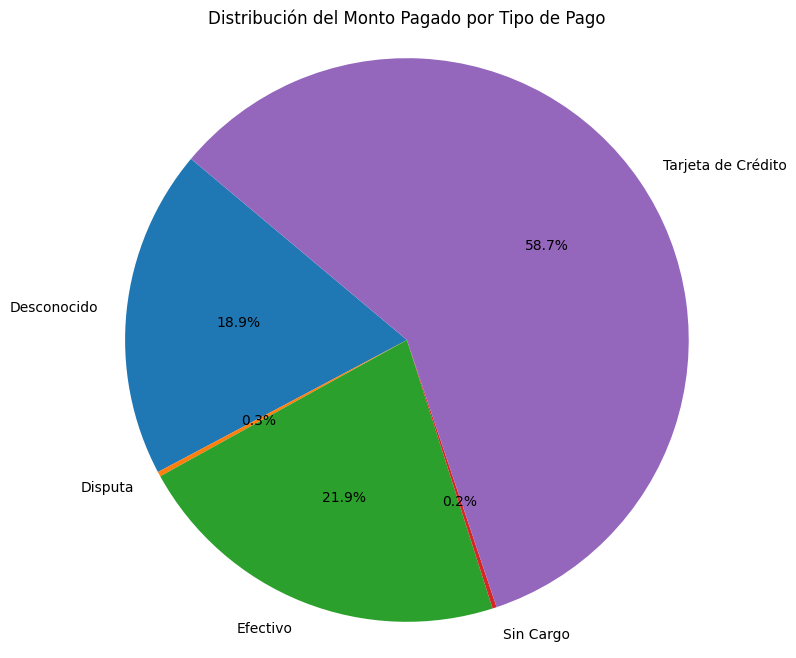

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo Taxis_NY.csv
df = pd.read_csv('Taxis_NY.csv')

# Mapeo de valores numéricos a etiquetas descriptivas para payment_type
payment_labels = {
    0.0: "Desconocido",
    1.0: "Tarjeta de Crédito",
    2.0: "Efectivo",
    3.0: "Sin Cargo",
    4.0: "Disputa",
    5.0: "Desconocido"
}

# Reemplazar los valores numéricos en la columna 'payment_type' con etiquetas descriptivas
df['payment_type'] = df['payment_type'].map(payment_labels)

# Calcular el total del monto pagado por tipo de pago
payment_totals = df.groupby('payment_type')['total_amount'].sum()

# Crear un gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(payment_totals, labels=payment_totals.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución del Monto Pagado por Tipo de Pago')
plt.axis('equal')  # Para asegurar que el gráfico sea un círculo
plt.show()


Ratio de viajes por ciudad: (kpi)

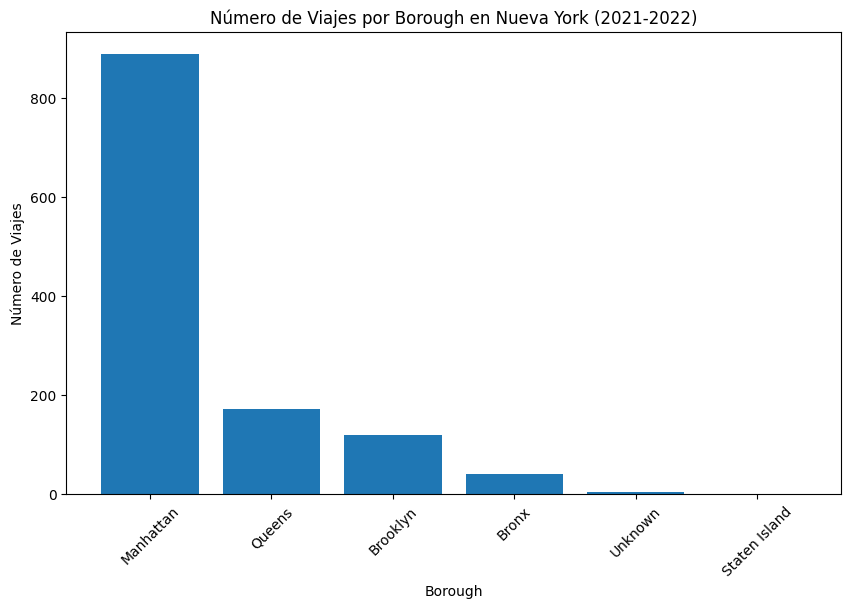

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el conjunto de datos
df = pd.read_csv("Taxis_NY.csv")

# Cargar el mapeo de 'PU_ID_borough' y 'Borough'
location_mapping = {
    0: "EWR",
    1: "Queens",
    2: "Bronx",
    3: "Manhattan",
    4: "Staten Island",
    5: "Brooklyn",
    6: "Unknown",
   }

# Agregar una nueva columna 'Borough' basada en 'PU_ID_borough'
df['Borough'] = df['PU_ID_borough'].map(location_mapping)

# Filtrar los datos para 2021-2022
filtered_df = df[(df['pickup_year'] >= 2021) & (df['pickup_year'] <= 2022)]

# Agrupar y contar el número de viajes por 'Borough'
aggregated_data = filtered_df['Borough'].value_counts().reset_index()
aggregated_data.columns = ['Borough', 'Número de Viajes']

# Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.bar(aggregated_data['Borough'], aggregated_data['Número de Viajes'])
plt.xlabel('Borough')
plt.ylabel('Número de Viajes')
plt.title('Número de Viajes por Borough en Nueva York (2021-2022)')
plt.xticks(rotation=45)
plt.show()


Precio promedio de viajes por ciudad: (kpi)

In [43]:
import pandas as pd

# Cargar el conjunto de datos
df = pd.read_csv("Taxis_NY.csv")

# Cargar el mapeo de 'PU_ID_borough' y 'Borough'
location_mapping = {
    0: "EWR",
    1: "Queens",
    2: "Bronx",
    3: "Manhattan",
    4: "Staten Island",
    5: "Brooklyn",
    6: "Unknown",
}

# Agregar una nueva columna 'Borough' basada en 'PU_ID_borough'
df['Borough'] = df['PU_ID_borough'].map(location_mapping)

# Filtrar los datos para 2021-2022
filtered_df = df[(df['pickup_year'] >= 2021) & (df['pickup_year'] <= 2022)]

# Calcular el precio promedio de viajes por distrito
average_price_by_borough = filtered_df.groupby('Borough')['total_amount'].mean().reset_index()
average_price_by_borough.columns = ['Borough', 'Precio Promedio']

# Ordenar de mayor a menor precio promedio
sorted_average_price = average_price_by_borough.sort_values(by='Precio Promedio', ascending=False)

# Ciudad con el precio promedio más alto
ciudad_mas_cara = sorted_average_price.iloc[0]['Borough']
precio_mas_alto = sorted_average_price.iloc[0]['Precio Promedio']

# Visualizar los resultados ordenados
print(sorted_average_price)

# Mostrar la ciudad con el precio promedio más alto
print(f"La ciudad con el precio promedio más alto es: {ciudad_mas_cara} con un precio promedio de {precio_mas_alto:.2f}")



         Borough  Precio Promedio
5        Unknown        42.302500
3         Queens        29.520698
1       Brooklyn        28.654083
0          Bronx        26.131707
2      Manhattan        17.651700
4  Staten Island        15.300000
La ciudad con el precio promedio más alto es: Unknown con un precio promedio de 42.30


Cantidad de viajes en horas pico (6am a 6pm):

In [42]:
# Filtrar las horas pico (por ejemplo, de 6 AM a 6 PM)
peak_hours = range(6, 18)

# Crear una máscara para seleccionar los viajes en horas pico
peak_hour_mask = df['pickup_hour'].isin(peak_hours)

# Filtrar el DataFrame original con la máscara de horas pico
df_peak_hours = df[peak_hour_mask]

# Agrupar y contar la cantidad de viajes por año
trips_by_year = df_peak_hours.groupby('pickup_year')['ID_taxis'].count()

# Mostrar el resultado
print("Cantidad de Viajes en Horas Pico por Año:")
print(trips_by_year)


Cantidad de Viajes en Horas Pico por Año:
pickup_year
2019    479
2020    486
2021    489
2022    452
Name: ID_taxis, dtype: int64


Cantidad de Viajes en Horas Pico contemplando el año: (kpi)

c:\Users\Silvanita\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Silvanita\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Silvanita\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


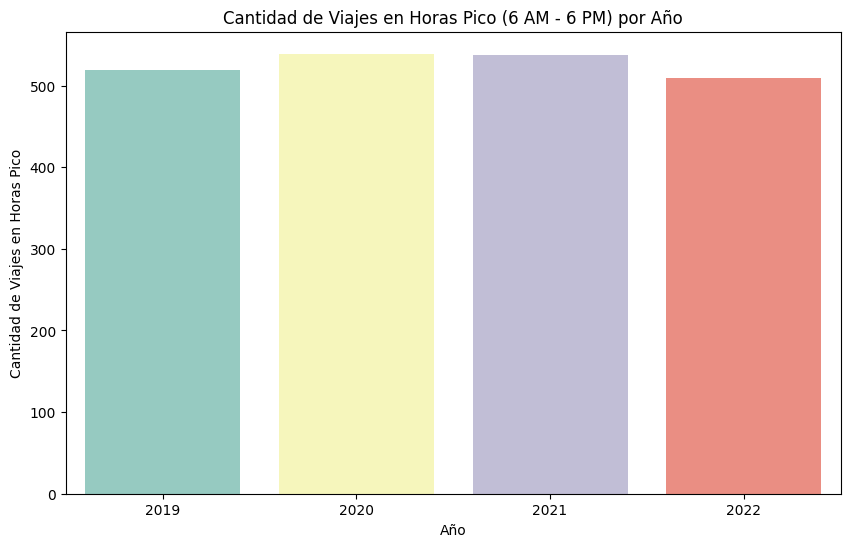

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar las horas pico (de 6 AM a 6 PM)
peak_hours = range(6, 18)

# Crear una máscara para seleccionar los viajes en horas pico
peak_hour_mask = (df['pickup_hour'] >= 6) & (df['pickup_hour'] <= 18)

# Filtrar el DataFrame original con la máscara de horas pico
df_peak_hours = df[peak_hour_mask]

# Gráfico de barras de la cantidad de viajes en horas pico por año
plt.figure(figsize=(10, 6))
sns.countplot(data=df_peak_hours, x='pickup_year', palette="Set3")
plt.xlabel('Año')
plt.ylabel('Cantidad de Viajes en Horas Pico')
plt.title('Cantidad de Viajes en Horas Pico (6 AM - 6 PM) por Año')
plt.show()


Gráfico de línea que muestra las horas picos por año:

c:\Users\Silvanita\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Silvanita\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Silvanita\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Silvanita\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categoric

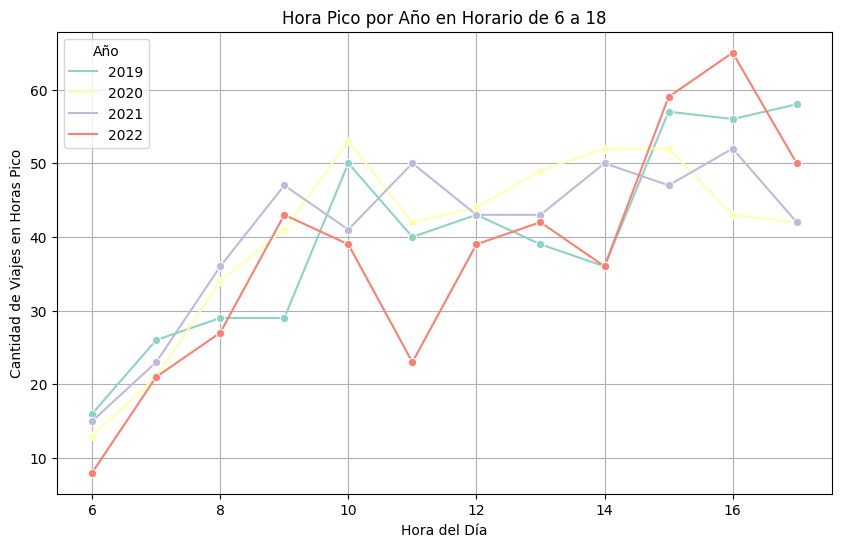

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar las horas pico (por ejemplo, de 6 AM a 6 PM)
peak_hours = range(6, 18)

# Crear una máscara para seleccionar los viajes en horas pico
peak_hour_mask = df['pickup_hour'].isin(peak_hours)

# Filtrar el DataFrame original con la máscara de horas pico
df_peak_hours = df[peak_hour_mask]

# Agrupar por año y hora, contar la cantidad de viajes y encontrar la hora pico en cada año
peak_hour_by_year = df_peak_hours.groupby(['pickup_year', 'pickup_hour'])['ID_taxis'].count().reset_index()

# Gráfico de líneas de la hora pico por año
plt.figure(figsize=(10, 6))
sns.lineplot(data=peak_hour_by_year, x='pickup_hour', y='ID_taxis', hue='pickup_year', marker='o', palette='Set3')
plt.xlabel('Hora del Día')
plt.ylabel('Cantidad de Viajes en Horas Pico')
plt.title('Hora Pico por Año en Horario de 6 a 18')
plt.grid()
plt.legend(title='Año', loc='upper left')
plt.show()


El eje X representa la cantidad de viajes y el eje Y representa la hora del dia. Cada punto en la línea muestra la hora pico para un año específico. Se puede observar las tendencias y cambios a lo largo de los años.

Viajes en Horas picos por mes:

c:\Users\Silvanita\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Silvanita\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Silvanita\AppData\Local\Temp\ipykernel_21540\1625386946.py:24: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=peak_hour_by_month, x='pickup_month', y='pickup_hour', marker='o', palette="Set3")
c:\Users\Silvanita\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be rem

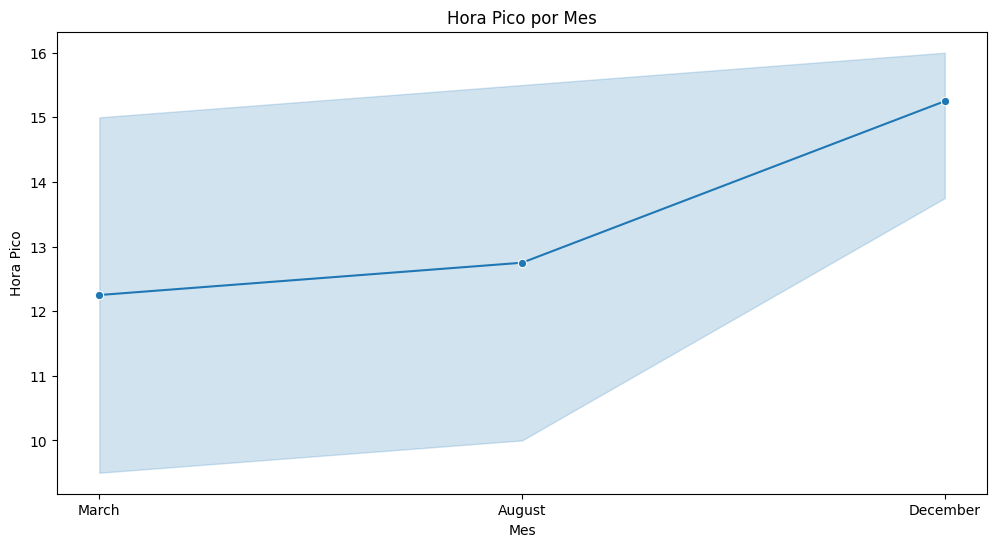

In [5]:
import calendar
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar las horas pico (por ejemplo, de 6 AM a 6 PM)
peak_hours = range(6, 18)

# Crear una máscara para seleccionar los viajes en horas pico
peak_hour_mask = df['pickup_hour'].isin(peak_hours)

# Filtrar el DataFrame original con la máscara de horas pico
df_peak_hours = df[peak_hour_mask]

# Agrupar por mes y hora, contar la cantidad de viajes y encontrar la hora pico en cada mes
peak_hour_by_month = df_peak_hours.groupby(['pickup_year', 'pickup_month', 'pickup_hour'])['ID_taxis'].count().reset_index()
peak_hour_by_month = peak_hour_by_month.sort_values(['pickup_year', 'pickup_month', 'ID_taxis'], ascending=[True, True, False])
peak_hour_by_month = peak_hour_by_month.drop_duplicates(subset=['pickup_year', 'pickup_month'])

# Mapear el número de mes al nombre del mes en español
peak_hour_by_month['pickup_month'] = peak_hour_by_month['pickup_month'].map(lambda x: calendar.month_name[x].capitalize())

# Gráfico de líneas de la hora pico por mes
plt.figure(figsize=(12, 6))
sns.lineplot(data=peak_hour_by_month, x='pickup_month', y='pickup_hour', marker='o', palette="Set3")
plt.xlabel('Mes')
plt.ylabel('Hora Pico')
plt.title('Hora Pico por Mes')
plt.show()


Cantidad de viajes según tipo de taxi:

c:\Users\Silvanita\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Silvanita\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Silvanita\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
c:\Users\Silvanita\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype i

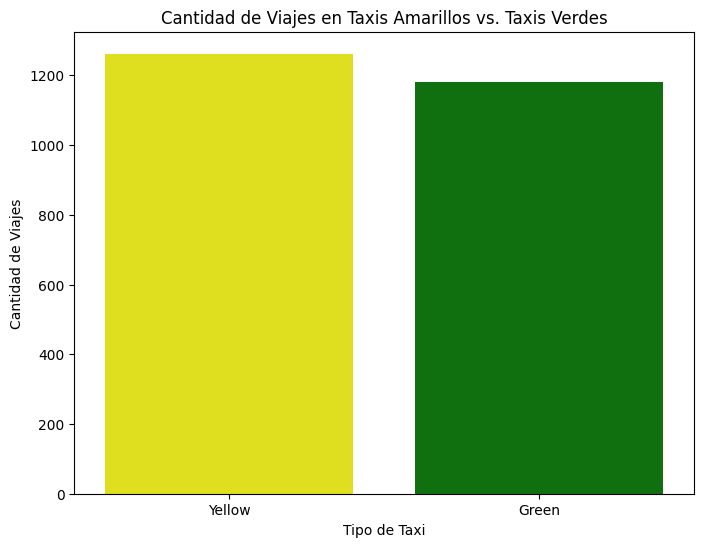

Los taxis amarillos (yellow) son más populares en Nueva York.


In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Contar la cantidad de viajes de taxis amarillos (yellow)
yellow_count = df[df['yellow'] == 1]['ID_taxis'].count()

# Contar la cantidad de viajes de taxis verdes (green)
green_count = df[df['yellow'] == 0]['ID_taxis'].count()

# Definir los colores para las barras
colors = ['yellow', 'green']

# Crear un gráfico de barras con colores personalizados
plt.figure(figsize=(8, 6))
sns.barplot(x=['Yellow', 'Green'], y=[yellow_count, green_count], palette=colors)
plt.xlabel('Tipo de Taxi')
plt.ylabel('Cantidad de Viajes')
plt.title('Cantidad de Viajes en Taxis Amarillos vs. Taxis Verdes')
plt.show()

# Determinar cuál es más popular
if yellow_count > green_count:
    print("Los taxis amarillos (yellow) son más populares en Nueva York.")
elif green_count > yellow_count:
    print("Los taxis verdes (green) son más populares en Nueva York.")
else:
    print("Los taxis amarillos y verdes son igualmente populares en Nueva York.")
